<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Regularización

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

## Descripción

* En esta ocasión utilizaremos datos de la composición química de muestras de vino.
* Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
* Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    + Identifique el tipo de datos de cada columna.
    + Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
    + Encuentre la cantidad de valores faltantes en cada columna.
    + Grafique la distribución empírica de cada atributo.


## Ejercicio 1: Preparación del Ambiente de Trabajo
___
* Importe las librerías básicas

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.
</div>

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Definimos algunos aspectos de ambiente y valores por defecto.
</div>

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (10, 6)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.
</div>

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

___
* Importe los métodos asociados a regularización 

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utilizan librerías <strong>sklearn</strong> para resolver el problema de regularización de parámetros desde <strong>Machine Learning</strong>, y se usarán los siguientes métodos:
</div>

In [4]:
# Métodos para generar modelos con regulación de parámetros
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
# Método para estandarizar datos
from sklearn.preprocessing import StandardScaler
# Método para la selección de datos entre entrenamiento y test
from sklearn.model_selection import train_test_split

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utilizan los siguientes métodos para evaluar las métricas del modelo desde <strong>Machine Learning</strong>
</div>

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

___
* Importe la base de datos

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Leemos el archivo csv y almacenamos los datos en un DataFrame
</div>

In [6]:
# Leemos el archivo csv y almacenamos los datos en un DataFrame
df = pd.read_csv("winequality-red.csv")

## Ejercicio 2: Análisis exploratorio
___
* Identifique el tipo de datos de cada columna.

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Con el método <strong>info</strong> revisamos rápidamente los tipos de datos de cada columna y si soportan valores nulos (nan). En caso de soportar tenemos indicios de que tendríamos valores perdidos.
</div>

In [7]:
# Con el método info revisamos los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Revisamos rápidamente los datos para tener una primera aproximación visual de nuestra base de datos
df.sample(5, random_state=14173)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
798,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,6
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5
1361,8.3,0.85,0.14,2.5,0.093,13.0,54.0,0.99724,3.36,0.54,10.1,5
1389,6.7,0.48,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,9.7,5
194,7.6,0.55,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.7,5


In [9]:
# Revisamos las dimensiones de la base de datos
df.shape

(1599, 12)

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
La base de datos se compone de 1599 observaciones con 12 atributos, dentro de los cuales se encuentra nuestra variable objetivo (quality). Mediante df.info() pudimos observar que todas las variables son numéricas y que <strong>no</strong> presentan valores perdidos, por lo tanto podemos comenzar a pensar en aplicar nuestro modelo sin problemas de este tipo.<br><br>
De todas manera revisaremos visualmente que no tenemos datos perdidos.
</div>

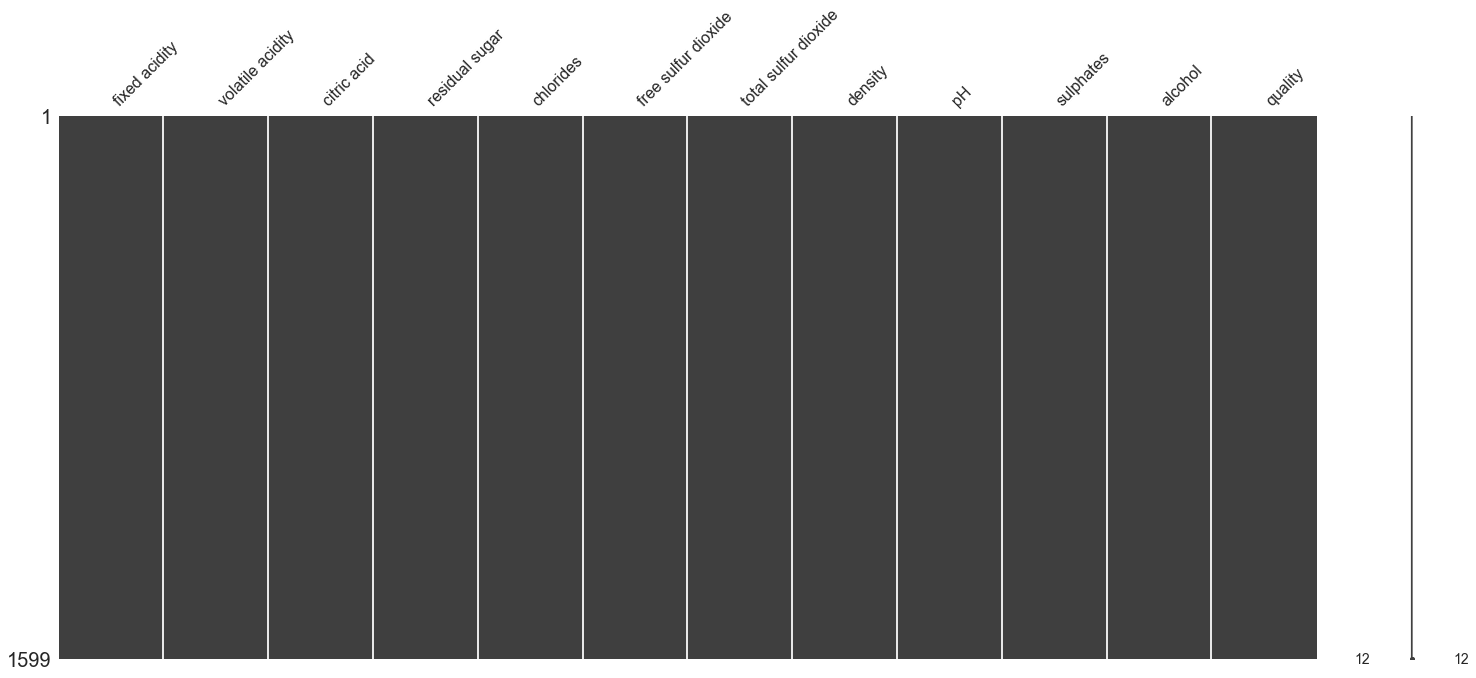

In [10]:
msngo.matrix(df)

___
* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.

#### Análisis Univariado:

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Revisamos valores que se escapan de los límites inferior (Q1-1.5RIC) y superior (Q3+1.5RIC)
</div>

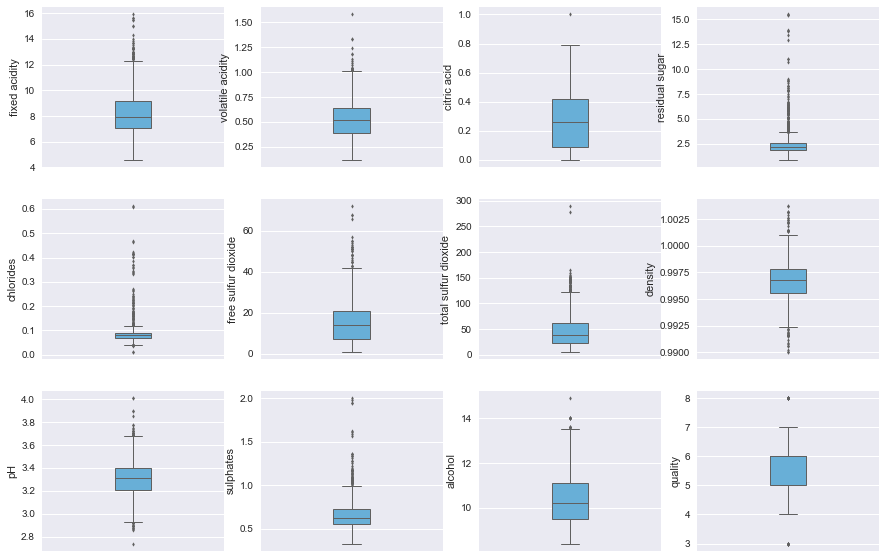

In [12]:
afx.display_boxplot(df, df.columns)

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
    Todos los atributos presentan datos atípicos (outliers), revisaremos el porcentaje de datos atípicos por cada variable con nuestra función disponible en <strong>ancilliary_funcs</strong> y se observa que los atributos <strong>[residual sugar]</strong> y <strong>[chlorides]</strong> son los que presentan mayor porcentaje de datos atípicos.<br><br>
</div>

In [13]:
afx.display_outliers(df)

,Variable,count,outliers,outliers %
0,fixed acidity,1599,49,3.06
1,volatile acidity,1599,19,1.19
2,citric acid,1599,1,0.06
3,residual sugar,1599,155,9.69
4,chlorides,1599,112,7.00
5,free sulfur dioxide,1599,30,1.88
6,total sulfur dioxide,1599,55,3.44
7,density,1599,45,2.81
8,pH,1599,35,2.19
9,sulphates,1599,59,3.69


<div style='color: #854000; background-color: #ffe5e5;border-color: #ffdaff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Dado que no hemos abordado en el curso como tratar los datos atípicos, vamos a dejar nuestra base tal como está.
</div>

#### Análisis Bi-Variado:

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Revisamos la relación de nuestros atributos con nuestra variable objetivo (quality).
</div>

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Vamos a separar nuestro análisis en dos grupos para poder visualizar mejor los gráficos. Tomaremos los primeros 6 atributos y graficaremos mediante <strong>pairplot</strong> de <strong>seaborn</strong> un diagrama de dispersión para ver como se relacionan los atributos con nuestra variable <strong>quality</strong>.
</div>

<Figure size 1080x720 with 0 Axes>

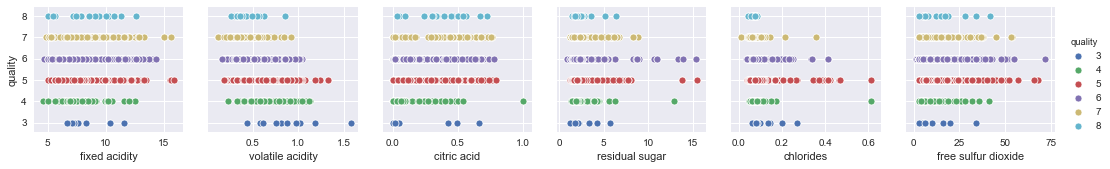

In [14]:
var_gx_1 = [x for i, x in enumerate(df.columns) if i <=5]
plt.figure(figsize=(15,10))
sns.pairplot(df, y_vars=['quality'], x_vars=var_gx_1, hue='quality')

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Ahora tomaremos los 5 atributos restantes y graficaremos mediante <strong>pairplot</strong> de <strong>seaborn</strong> un diagrama de dispersión.
</div>

<Figure size 1080x720 with 0 Axes>

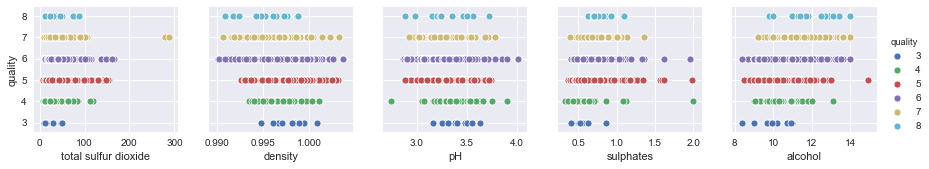

In [15]:
var_gx_2 = [x for i, x in enumerate(df.columns) if i > 5 and i < len(df.columns)-1]
plt.figure(figsize=(15,10))
sns.pairplot(df, y_vars=['quality'], x_vars=var_gx_2, diag_kind='kde', hue='quality')

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
    Visualmente podemos ver que todas las relaciones de atributos/quality presentan datos atípicos (outliers), que se escapan de la concentración de los datos.
</div>

<div style='color: #854000; background-color: #ffe5e5;border-color: #ffdaff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Dado que no hemos abordado en el curso como tratar los datos atípicos, vamos a dejar nuestra base tal como está.
</div>

## Ejercicio 3: Regularización de modelos

* Genere tres modelos, correspondientes a `RidgeCV` , `LassoCV` y `ElasticNetCV` . Para cada uno de ellos implemente los siguientes pasos:

* Entrene los modelos con 10 validaciones cruzadas.
* Extraiga los coeficientes estimados, el mejor valor alpha, MAE ( median_absolute_error ) y RMSE ( mean_squared_error ) asociado a cada modelo.
* En base a la información solicitada, responda lo siguiente:
* ¿Qué modelo presenta un mejor desempeño en base a las métricas?
* ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

### Sobre los métodos `RidgeCV` , `LassoCV` y `ElasticNetCV`

* Para implementar la búsqueda de hiperparámetros con validación cruzada, utilizaremos la clase sklearn.linear_model.{RidgeCV, LassoCV, ElasticNetCV}.
* Por defecto, la clase necesita de una lista de valores `alphas` que representa el hiperparámetro de validación. Si no se define la lista, el método incorporará un array con valores por defecto.
* Por defecto la clase tendrá una opción scoring que permitirá definir la métrica con la cual se evaluará el mejor hiperparámetro. Para el caso de un problema de regresión, si no se define, la métrica será el error cuadrático promedio negativo (más alto es mejor).
* Una vez entrenado el modelo, se puede reportar el mejor alpha con `modelo_entrenado.alpha_`, el valor de los coeficientes con `modelo_entrenado.coef_` y los valores de la métrica de desempeño con `modelo_entrenado.cv_values_` (mse_path_).

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Cómo ya sabemos, los métodos de regularización son sensibles a las escalas de las variables ingresadas, por lo tanto aplicaremos una estandarización a nuestra base de datos:
</div>

In [16]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [17]:
# Mantenemos nuestro vector objetivo tal cual viene en nuestra base
df_scaled['quality'] = df['quality']

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Separamos nuestra base en datos para <strong>entrenamiento</strong> y <strong>validación</strong>, utilizaremos un 33% de la data para validar y el resto para el entrenamiento.
</div>

In [18]:
# Generamos nuestra matriz de atributos (variables independientes)
X = df_scaled.drop(columns='quality')
# aislamos el vector objetivo
y = df_scaled['quality']
# Procedemos a separar los datos para test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=14173)

___
### RidgeCV

In [19]:
# Defino los alphas para la regularización
alphas_ = np.logspace(0, 7, base = 10, num=4)
# Genero un modelo con 10 validaciones cruzadas y los alphas_ generados
ridge_cv = RidgeCV(cv = 10, alphas=alphas_)
# Entreno el modelo
model_ridge = ridge_cv.fit(X_train, y_train)

In [20]:
# Función auxiliar que genera un reporte de regularización
afx.report_regularization(model_ridge, X_test, y_test)

Valor del parámetro de regularización: 1.0

Coeficientes finales: 
fixed acidity           0.090145
volatile acidity       -0.206678
citric acid            -0.063373
residual sugar          0.042638
chlorides              -0.094362
free sulfur dioxide     0.025202
total sulfur dioxide   -0.095561
density                -0.070666
pH                     -0.041966
sulphates               0.165201
alcohol                 0.275239
dtype: float64

Error Cuadrático Medio:
0.4145

Error Medio Absoluto:
0.381

R cuadrado:
0.35


___
### LassoCV

In [21]:
# Defino los alphas para la regularización
alphas_ = np.logspace(0, -3, base = 10, num=4)
# Genero un modelo con 10 validaciones cruzadas y los alphas_ generados
lasso_cv = LassoCV(cv = 10, alphas=alphas_)
# Entreno el modelo
model_lasso = lasso_cv.fit(X_train, y_train)

In [22]:
# Función auxiliar que genera un reporte de regularización
afx.report_regularization(model_lasso, X_test, y_test, show_mse_cv = True)

Valor del parámetro de regularización: 0.001

Coeficientes finales: 
fixed acidity           0.081318
volatile acidity       -0.205551
citric acid            -0.058651
residual sugar          0.039137
chlorides              -0.093825
free sulfur dioxide     0.023017
total sulfur dioxide   -0.093848
density                -0.063238
pH                     -0.043058
sulphates               0.162923
alcohol                 0.278303
dtype: float64

Valores de la métrica de desempeño (mse) de CV:


,cv_1,cv_2,cv_3,cv_4,cv_5,cv_6,cv_7,cv_8,cv_9,cv_10
alpha_1.0,0.675237,0.750982,0.683031,0.595101,0.659540,0.598377,0.682865,0.738677,0.485269,0.747822
alpha_0.1,0.522709,0.531798,0.526036,0.414153,0.400779,0.421463,0.486668,0.477627,0.306285,0.543165
alpha_0.01,0.487257,0.473984,0.513429,0.383710,0.357762,0.399856,0.467271,0.417503,0.300069,0.516197
alpha_0.001,0.484693,0.469767,0.515541,0.387313,0.359407,0.394006,0.466109,0.413706,0.300120,0.512644


Error Cuadrático Medio:
0.414

Error Medio Absoluto:
0.3816

R cuadrado:
0.35


___
### ElasticNetCV

In [23]:
# Defino los alphas para la regularización
alphas_ = np.logspace(0, -3, base = 10, num=4)
# Genero un modelo con 10 validaciones cruzadas y los alphas_ generados
elastic_cv = ElasticNetCV(cv = 10, alphas=alphas_)
# Entreno el modelo
model_elastic = elastic_cv.fit(X_train, y_train)

In [24]:
# Función auxiliar que genera un reporte de regularización
afx.report_regularization(model_elastic, X_test, y_test, show_mse_cv = True)

Valor del parámetro de regularización: 0.001

Coeficientes finales: 
fixed acidity           0.085766
volatile acidity       -0.206104
citric acid            -0.060998
residual sugar          0.040898
chlorides              -0.094090
free sulfur dioxide     0.024106
total sulfur dioxide   -0.094701
density                -0.066992
pH                     -0.042486
sulphates               0.164061
alcohol                 0.276739
dtype: float64

Valores de la métrica de desempeño (mse) de CV:


,cv_1,cv_2,cv_3,cv_4,cv_5,cv_6,cv_7,cv_8,cv_9,cv_10
alpha_1.0,0.675237,0.750982,0.683031,0.595101,0.659540,0.598377,0.682865,0.738677,0.485269,0.747822
alpha_0.1,0.506272,0.503749,0.503016,0.394606,0.376219,0.407406,0.475903,0.440981,0.296492,0.530057
alpha_0.01,0.485199,0.471334,0.514526,0.385448,0.358347,0.396209,0.465998,0.416036,0.299907,0.513615
alpha_0.001,0.484741,0.469622,0.515483,0.387617,0.359536,0.393819,0.466199,0.413356,0.300085,0.512591


Error Cuadrático Medio:
0.4143

Error Medio Absoluto:
0.3812

R cuadrado:
0.35


___
* ¿Qué modelo presenta un mejor desempeño en base a las métricas?

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Los 3 modelos presentan un $R^2$ igual a $0.35$, los cuales presentan poca explicación de la varianza de la variable dependiente.
</div>

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Los 3 modelos presentan un $MSE$ similar, no obstante el modelo regularizado mediante norma <strong>L1 (LassoCV)</strong> presenta el valor más bajo $0.414$, diferenciándose en las milésimas con los otros dos modelos (RidgeCV: 0.4145, ElasticNetCV: 0.4143).
</div>

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Los 3 modelos presentan un $MAE$ similar, no obstante el modelo regularizado mediante norma <strong>L2 (RidgeCV)</strong> presenta el valor más bajo $0.381$, diferenciándose en las milésimas con los otros dos modelos (LassoCV: 0.3816 y ElasticNetCV: 0.3812).
</div>

<div style='color: #854000; background-color: #ffe5e5;border-color: #ffdaff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Dado que no se logró encontrar un modelo sustancialmente mejor que otro, me veo en la necesidad de comparar las métricas con un modelo de Regresión Lineal estándar.
</div>

___
### Regresión Lineal

In [25]:
# Se importa libreria para modelo de regression Lineal (sin regularización)
from sklearn.linear_model import LinearRegression

In [26]:
model_lineal = LinearRegression().fit(X_train, y_train)

In [27]:
yhat = model_lineal.predict(X_test)

In [28]:
afx.report_scores_lineal(y_test, yhat)

Error Cuadrático Medio:
0.4145

Error Medio Absoluto:
0.381

R cuadrado:
0.35


In [29]:
print(f"Coeficientes finales:\n{pd.Series(model_lineal.coef_, X_test.columns)}")


Coeficientes finales:
fixed acidity           0.090476
volatile acidity       -0.207011
citric acid            -0.063974
residual sugar          0.042698
chlorides              -0.094357
free sulfur dioxide     0.025246
total sulfur dioxide   -0.095558
density                -0.070640
pH                     -0.042055
sulphates               0.165356
alcohol                 0.275533
dtype: float64


<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Podemos observar que el modelo de Regresión Lineal sin regularización de parámetros tiene el mismo desempeño respecto a $R^2 = 0.35$.<br><br>
Para el caso de $MSE = 0.4145$ y $MAE = 0.381$ se obtienen los mismos resultados que el modelo regularizado mediante norma <strong>L2 (RidgeCV)</strong>
</div>

___
* ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

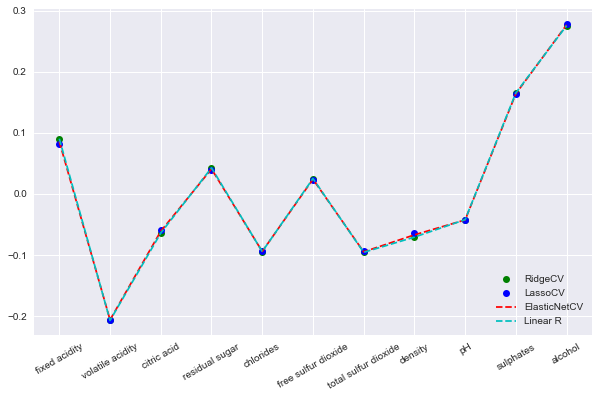

In [30]:
plt.plot(X_train.columns,model_ridge.coef_, 'go', label='RidgeCV')
plt.tick_params(axis='x', rotation=30)
plt.plot(model_lasso.coef_, 'bo', label='LassoCV')
plt.plot(model_elastic.coef_, 'r--', label='ElasticNetCV')
plt.plot(model_lineal.coef_, 'c--', label='Linear R')
plt.legend(loc='lower right')

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Podemos observar que los 4 modelos (incluímos el modelo de regresión lineal sin regularizar parámetros) presentan una estabilidad en los atributos, no obstante hay una mayor similitud en el comportamiento de los modelos RidgeCV y LinearRegression, como tambien entre el modelo LassoCV y ElasticNetCV.
</div>

In [31]:
# Distancia entre los coeficientes de modelo lasso y lineal
np.sqrt(sum((model_lasso.coef_ - model_lineal.coef_)**2))

0.014302896494137527

In [32]:
# Distancia entre los coeficientes de modelo lasso y ridge
np.sqrt(sum((model_lasso.coef_ - model_ridge.coef_)**2))

0.013880365350685571

In [33]:
# Distancia entre los coeficientes de modelo elastic y lineal
np.sqrt(sum((model_elastic.coef_ - model_lineal.coef_)**2))

0.007337093834565567

In [34]:
# Distancia entre los coeficientes de modelo lasso y elastic
np.sqrt(sum((model_lasso.coef_ - model_elastic.coef_)**2))

0.00698869945654568

In [35]:
# Distancia entre los coeficientes de modelo ridge y elastic
np.sqrt(sum((model_ridge.coef_ - model_elastic.coef_)**2))

0.006892036058028167

In [36]:
# Distancia entre los coeficientes de modelo ridge y lineal
np.sqrt(sum((model_ridge.coef_ - model_lineal.coef_)**2))

0.0008408073498503649

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Producto que en el gráfico no se logra identificar con claridad la similitud de los modelos se representó mediante una suma de distancias entre los coeficientes de cada modelo y se logró determinar que los RidgeCV y LinearRegression son los mas similares.
</div>